In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:53<00:00, 22.1MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.4MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

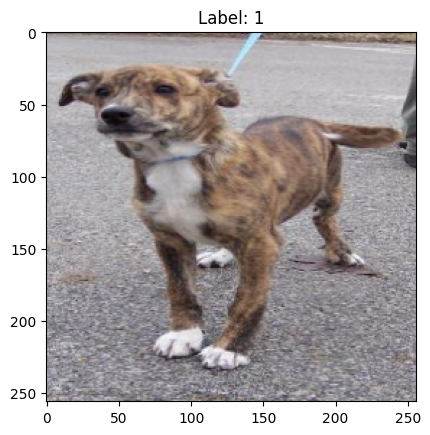

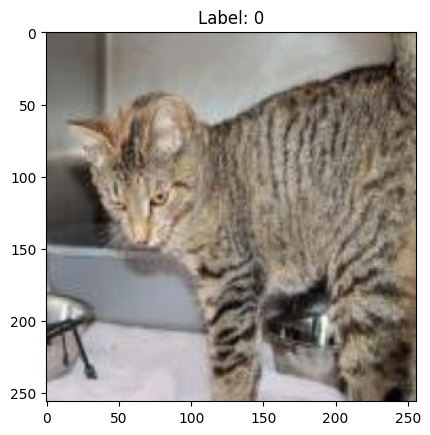

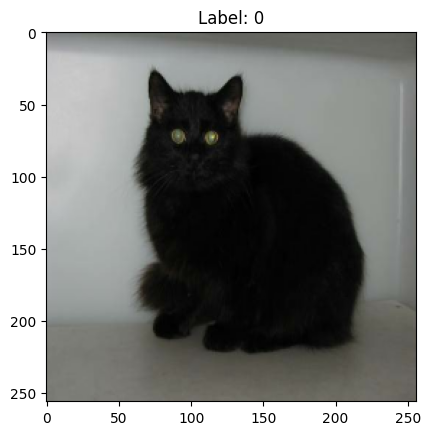

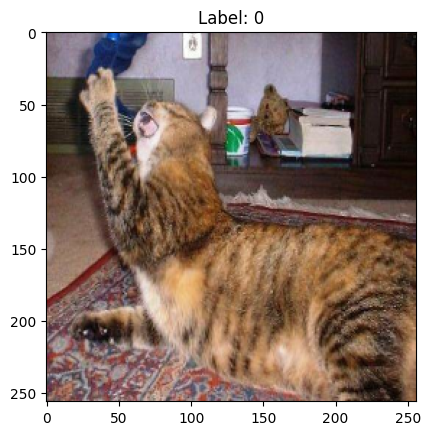

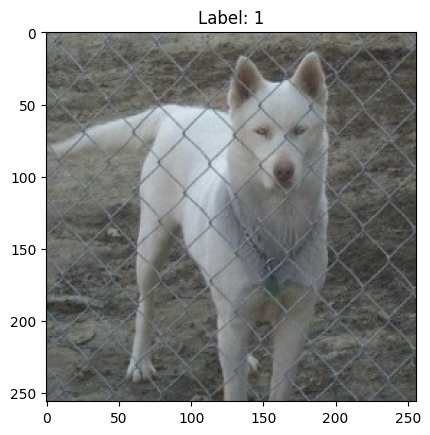

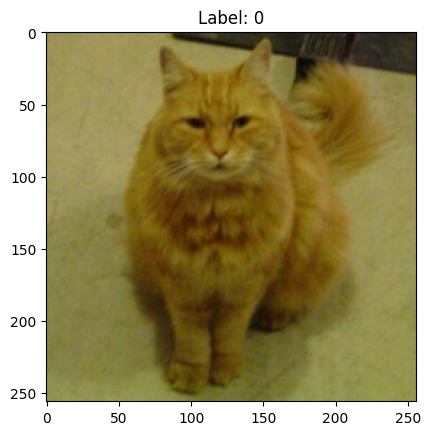

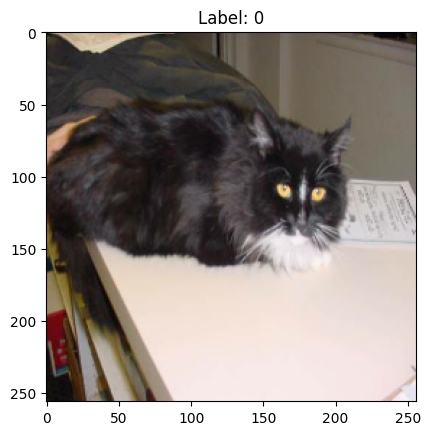

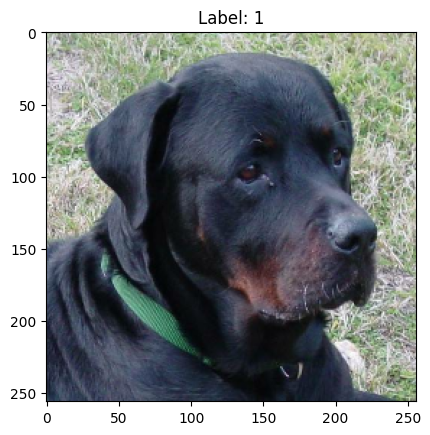

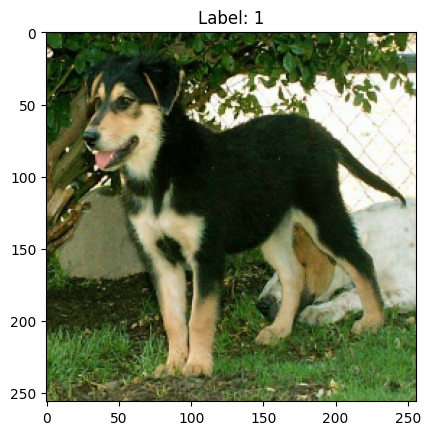

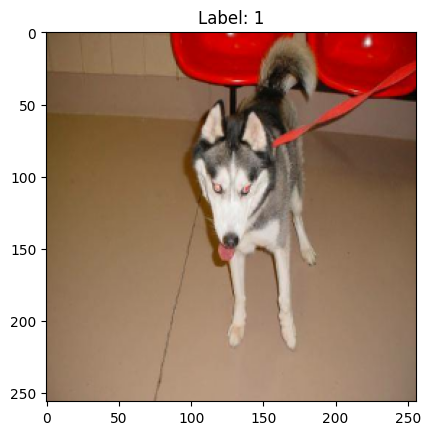

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming you have a normalized Dataset object named train_ds
# Create an iterator
train_iterator = iter(train_ds)

# Get a single batch from the dataset
batch = next(train_iterator)
for i in range(10):
  # Extract an image and label from the batch
  image = batch[0][i]  # Assuming the image is at index [0][0]
  label = batch[1][i]  # Assuming the label is at index [1][0]

  # Display the image using Matplotlib
  plt.imshow(image)  # No need to use .numpy() here if image is a NumPy array
  plt.title(f"Label: {label.numpy()}")
  plt.show()


In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 101ms/step - loss: 1.3725 - accuracy: 0.5935 - val_loss: 0.6134 - val_accuracy: 0.6404
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5717 - accuracy: 0.7034 - val_loss: 0.5702 - val_accuracy: 0.6916
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4879 - accuracy: 0.7664 - val_loss: 0.4730 - val_accuracy: 0.7708
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4216 - accuracy: 0.8086 - val_loss: 0.4705 - val_accuracy: 0.7776
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3738 - accuracy: 0.8384 - val_loss: 0.4825 - val_accuracy: 0.7836
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2978 - accuracy: 0.8730 - val_loss: 0.5632 - val_accuracy: 0.7904
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2238 - accuracy: 0.9076 - val_loss: 0.6119 - val_ac

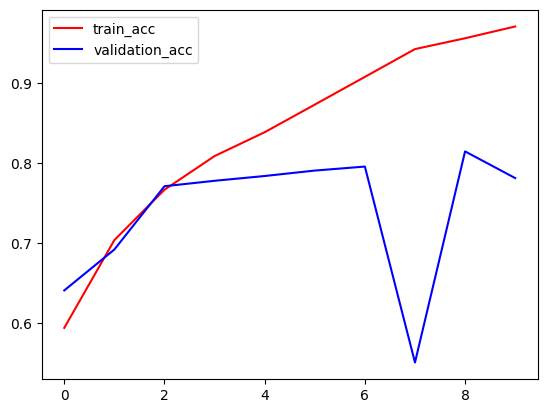

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train_acc')
plt.plot(history.history['val_accuracy'],color='blue',label='validation_acc')
plt.legend()
plt.show()

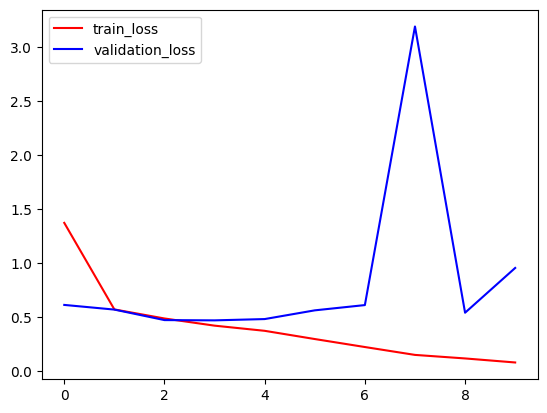

In [19]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity



In [48]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # You can adjust the dropout rate if needed
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # You can adjust the dropout rate if needed
model.add(Dense(1, activation='sigmoid'))

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = model.fit(
    train_ds,  # Your training dataset
    epochs=100,  # Number of training epochs
    validation_data=validation_ds,  # Your validation dataset
    callbacks=[early_stopping]
)



Epoch 1/100
625/625 [==============================] - 68s 103ms/step - loss: 6.9102 - accuracy: 0.5035 - val_loss: 1.8985 - val_accuracy: 0.5540
Epoch 2/100
625/625 [==============================] - 65s 104ms/step - loss: 2.0779 - accuracy: 0.5081 - val_loss: 2.0724 - val_accuracy: 0.5010
Epoch 3/100
625/625 [==============================] - 64s 102ms/step - loss: 2.0065 - accuracy: 0.5124 - val_loss: 1.2130 - val_accuracy: 0.5306
Epoch 4/100
625/625 [==============================] - 67s 107ms/step - loss: 1.0377 - accuracy: 0.5025 - val_loss: 0.9785 - val_accuracy: 0.5766
Epoch 5/100
625/625 [==============================] - 66s 106ms/step - loss: 0.8580 - accuracy: 0.4967 - val_loss: 0.7930 - val_accuracy: 0.5048
Epoch 6/100
625/625 [==============================] - 65s 103ms/step - loss: 0.7780 - accuracy: 0.4958 - val_loss: 0.7422 - val_accuracy: 0.5014
Epoch 7/100
625/625 [==============================] - 67s 106ms/step - loss: 0.7332 - accuracy: 0.4972 - val_loss: 0.7141 -

KeyboardInterrupt: ignored

In [20]:
import cv2

shape of image of dog (960, 1280, 3)
priction value for dog =1 
1/1 [==============================] - 0s 30ms/step
DOG 1


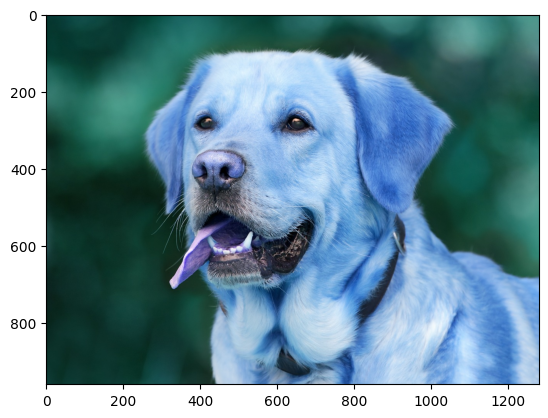

In [35]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
print("shape of image of dog",test_img.shape)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
print("priction value for dog =1 ")
model.predict(test_input)
if model.predict(test_input)==1:
  print("DOG",1)

shape of image of cat (6240, 4160, 3)
priction value for cat =0 
1/1 [==============================] - 0s 20ms/step
CAT [[0.]]


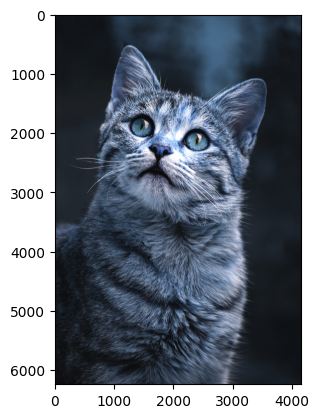

In [37]:
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)
print("shape of image of cat",test_img.shape)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
print("priction value for cat =0 ")
model.predict(test_input)
if model.predict(test_input)==0:
  print("CAT",model.predict(test_input))